In [1]:
import pandas as pd

def readfile(name):
    data = pd.read_csv(name, low_memory=False)
    return data

data_04 = readfile("data_0405.csv")
data_comb_households = readfile("data_comb_households.csv")

/tmp/ipykernel_345409/2826148491.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Create a new DataFrame
existing_df = data_04.copy()

new_df = existing_df.copy()

valid_values = [8, 9, 10]

# Filter the DataFrame based on the condition
filtered_df = new_df[new_df['NCHILD'].isin(valid_values)]

# Reset index after filtering
filtered_df.reset_index(drop=True, inplace=True)

fake_df = filtered_df.copy()
print(fake_df.shape)

# Add columns for partial_vaccination and no_vaccination
filtered_df['partial_vaccination'] = 0
filtered_df['no_vaccination'] = 0
filtered_df['full_vaccination'] = 0

# Apply conditions to set values for partial_vaccination and no_vaccination columns
filtered_df.loc[(existing_df['LB24'] == '(0) No') | 
            (existing_df['LB25'] < 3) | 
            (existing_df['LB26A'] < 3), 'partial_vaccination'] = 1

# Modify the condition for partial vaccination to ensure lb24, lb25, and LB26A are not all 0
filtered_df.loc[(existing_df['LB24'] == '(0) No') & 
            (existing_df['LB25'] == 0) & 
            (existing_df['LB26A'] == 0), 'partial_vaccination'] = 0

filtered_df.loc[(existing_df['LB24'] == '(0) No') & 
            (existing_df['LB25'] == 0) & 
            (existing_df['LB26A'] == 0), 'no_vaccination'] = 1

filtered_df.loc[(filtered_df['partial_vaccination'] == 0) &
                (filtered_df['no_vaccination'] == 0),
                'full vaccination'
                ] = 1

analysis_df = filtered_df.dropna(subset=['LB24','LB25','LB26A'])
analysis_df.reset_index(drop=True, inplace=True)

partial_no_vaccination_df = analysis_df[['partial_vaccination', 'no_vaccination', 'full vaccination']]
partial_no_vaccination_df


(144, 946)


/tmp/ipykernel_345409/3742951940.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['partial_vaccination'] = 0
/tmp/ipykernel_345409/3742951940.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['no_vaccination'] = 0
/tmp/ipykernel_345409/3742951940.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

,partial_vaccination,no_vaccination,full vaccination
0,0,0,1.0
1,0,0,1.0
2,0,0,1.0
3,0,0,1.0
4,1,0,NaN
...,...,...,...
63,0,0,1.0
64,0,0,1.0
65,1,0,NaN
66,0,0,1.0


In [3]:
data_comb_indi = readfile("data_comb_individuals.csv")
data_comb_indi.head(10)
data_comb_indi["IDHH"]

0          102010201
1          102010201
2          102010201
3          102010201
4          102010201
             ...    
150978    3402061301
150979    3402061401
150980    3402061401
150981    3402061401
150982    3402061401
Name: IDHH, Length: 150983, dtype: int64

In [4]:
data_1112 = readfile("data_1112.csv")
print(data_1112["IDHH"].dtype)
data_1112['modified_IDHH'] = data_1112['IDHH'].apply(lambda x:int(str(x)[:-1]))
data_1112['modified_IDHH']
a = data_1112['modified_IDHH'].unique()
a.dtype

int64


dtype('int64')

In [5]:

data_04=readfile("data_0405.csv")
data_04
data_04 = data_04[data_04['IDHH'].isin(a)]
data_04

b = data_04["IDHH"].unique()

In [6]:
data_indi = readfile("data_1112_individual.csv")
data_indi['modified_IDHH'] = data_indi['IDHH'].apply(lambda x:int(str(x)[:-1]))

data_test = data_indi[data_indi['modified_IDHH'].isin(b)]
data_test.reset_index(inplace=True, drop = True)
data_test

,Unnamed: 0,SURVEY,STATEID,DISTID,PSUID,HHID,HHSPLITID,PERSONID,IDPSU,IDHH,...,MG9NM,MG10,MG11,MGYEAR5,NMIG5,MGMONTHS5,MGYEAR1,NMIG1,MGMONTHS1,modified_IDHH
0,1,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,10,1,1.0,10201,102010101,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201010
1,2,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,10,1,2.0,10201,102010101,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201010
2,3,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,10,1,3.0,10201,102010101,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201010
3,4,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,10,1,4.0,10201,102010101,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201010
4,5,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,10,1,5.0,10201,102010101,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198964,204147,(2) IHDS-II 2,(33) Tamil Nadu 33,30,11,150,1,1.0,333011,3330111501,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,333011150
198965,204148,(2) IHDS-II 2,(33) Tamil Nadu 33,30,11,150,1,2.0,333011,3330111501,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,333011150
198966,204149,(2) IHDS-II 2,(33) Tamil Nadu 33,30,11,150,1,3.0,333011,3330111501,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,333011150
198967,204150,(2) IHDS-II 2,(33) Tamil Nadu 33,30,11,150,1,4.0,333011,3330111501,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,333011150


In [7]:
data_04['partial_vaccination'] = 0
data_04['no_vaccination'] = 0

# Apply conditions to set values for partial_vaccination and no_vaccination columns
data_04.loc[(data_04['LB24'] == '(0) No') | 
            (data_04['LB25'] < 3) | 
            (data_04['LB26A'] < 3), 'partial_vaccination'] = 1

# Modify the condition for partial vaccination to ensure lb24, lb25, and LB26A are not all 0
data_04.loc[(data_04['LB24'] == '(0) No') & 
            (data_04['LB25'] == 0) & 
            (existing_df['LB26A'] == 0), 'partial_vaccination'] = 0

data_04.loc[(data_04['LB24'] == '(0) No') & 
            (data_04['LB25'] == 0) & 
            (data_04['LB26A'] == 0), 'no_vaccination'] = 1

data_04.loc[(data_04['partial_vaccination'] == 0) &
                (data_04['no_vaccination'] == 0),
                'full vaccination'
                ] = 1

data_04["full vaccination"].fillna(0, inplace=True)
data_04["full vaccination"] = data_04["full vaccination"].astype(int)

data_04

/tmp/ipykernel_345409/3301736945.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_04["full vaccination"].fillna(0, inplace=True)


,Unnamed: 0,CASEID,STATEID,DISTID,PSUID,HHID,HHSPLITID,IDHH,IDPSU,STATEID2,...,MH2AC,MH18BC,MH18BF,MH18AC,MH19BC,MH19BF,MH19AC,partial_vaccination,no_vaccination,full vaccination
0,1,10201010,(01) Jammu & Kashmir,2,1,1,0,10201010,10201,(101) Jammu & Kashmir,...,13.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
1,2,10201020,(01) Jammu & Kashmir,2,1,2,0,10201020,10201,(101) Jammu & Kashmir,...,20.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
2,3,10201030,(01) Jammu & Kashmir,2,1,3,0,10201030,10201,(101) Jammu & Kashmir,...,19.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
3,4,10201040,(01) Jammu & Kashmir,2,1,4,0,10201040,10201,(101) Jammu & Kashmir,...,21.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
4,5,10201050,(01) Jammu & Kashmir,2,1,5,0,10201050,10201,(101) Jammu & Kashmir,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41444,41445,333011110,(33) Tamil Nadu,30,11,11,0,333011110,333011,(733) Tamil Nadu,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
41445,41446,333011120,(33) Tamil Nadu,30,11,12,0,333011120,333011,(733) Tamil Nadu,...,24.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1
41446,41447,333011130,(33) Tamil Nadu,30,11,13,0,333011130,333011,(733) Tamil Nadu,...,16.0,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0
41447,41448,333011140,(33) Tamil Nadu,30,11,14,0,333011140,333011,(733) Tamil Nadu,...,19.0,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1


In [8]:
# getting idhh for bivariate analysis
fv_df = data_04[data_04["full vaccination"]==1]
fv_df.reset_index(drop=True, inplace=True)
fv_df
fv_ids = fv_df["IDHH"].unique()

In [9]:
pv_df = data_04[data_04["partial_vaccination"]==1]
pv_df.reset_index(inplace=True, drop=True)
pv_df
pv_ids = pv_df["IDHH"].unique()


In [10]:
import numpy as np
nv_df = data_04[data_04["no_vaccination"]==1]
nv_df.reset_index(inplace=True, drop=True)
nv_df
nv_ids = nv_df["IDHH"].unique()
all_ids = nv_ids.tolist() + pv_ids.tolist() + fv_ids.tolist()



In [11]:
data_1112 = data_1112[data_1112["modified_IDHH"].isin(all_ids)]
data_1112["vaccination"] = 0
data_indi_2 =data_indi[["modified_IDHH","TA9B",'TA8B','TA10B']]
data_indi_2= data_indi_2.rename(columns={"modified_IDHH": "HHID"})

data_indi

,Unnamed: 0,SURVEY,STATEID,DISTID,PSUID,HHID,HHSPLITID,PERSONID,IDPSU,IDHH,...,MG9NM,MG10,MG11,MGYEAR5,NMIG5,MGMONTHS5,MGYEAR1,NMIG1,MGMONTHS1,modified_IDHH
0,1,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,10,1,1.0,10201,102010101,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201010
1,2,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,10,1,2.0,10201,102010101,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201010
2,3,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,10,1,3.0,10201,102010101,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201010
3,4,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,10,1,4.0,10201,102010101,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201010
4,5,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,10,1,5.0,10201,102010101,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204564,204565,(2) IHDS-II 2,(34) Pondicherry 34,0,6,130,1,4.0,340206,3402061301,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,340206130
204565,204566,(2) IHDS-II 2,(34) Pondicherry 34,0,6,140,1,1.0,340206,3402061401,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,340206140
204566,204567,(2) IHDS-II 2,(34) Pondicherry 34,0,6,140,1,2.0,340206,3402061401,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,340206140
204567,204568,(2) IHDS-II 2,(34) Pondicherry 34,0,6,140,1,3.0,340206,3402061401,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,340206140


In [12]:
data_indi_fv = data_indi[data_indi["modified_IDHH"].isin(b)]
data_indi_fv.reset_index(inplace=True, drop=True)
data_indi_fv = data_indi_fv[data_indi_fv["RO5"].isin([8,9,10])]
data_indi_fv.reset_index(inplace=True, drop=False)
data_indi_fv

,index,Unnamed: 0,SURVEY,STATEID,DISTID,PSUID,HHID,HHSPLITID,PERSONID,IDPSU,...,MG9NM,MG10,MG11,MGYEAR5,NMIG5,MGMONTHS5,MGYEAR1,NMIG1,MGMONTHS1,modified_IDHH
0,18,19,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,20,1,10.0,10201,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201020
1,22,23,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,20,1,14.0,10201,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201020
2,102,103,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,110,1,4.0,10201,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201110
3,107,108,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,120,1,4.0,10201,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201120
4,120,121,(2) IHDS-II 2,(01) Jammu & Kashmir 01,2,1,140,1,6.0,10201,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,10201140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11076,198822,204005,(2) IHDS-II 2,(33) Tamil Nadu 33,30,9,130,1,3.0,333009,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,333009130
11077,198864,204047,(2) IHDS-II 2,(33) Tamil Nadu 33,30,10,70,1,3.0,333010,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,333010070
11078,198903,204086,(2) IHDS-II 2,(33) Tamil Nadu 33,30,11,10,1,4.0,333011,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,333011010
11079,198926,204109,(2) IHDS-II 2,(33) Tamil Nadu 33,30,11,40,1,5.0,333011,...,,NaN,NaN,(0) No 0,NaN,NaN,(0) No 0,NaN,NaN,333011040


In [13]:
data_04["vaccination"] = 0
data_04.loc[data_04["no_vaccination"]==1,"vaccination"] = 0
data_04.loc[data_04["partial_vaccination"]==1,"vaccination"] = 1
data_04.loc[data_04["full vaccination"]==1,"vaccination"] = 2
data_04 = data_04[["HHID","vaccination"]]
data_04

,HHID,vaccination
0,1,2
1,2,1
2,3,2
3,4,2
4,5,2
...,...,...
41444,11,2
41445,12,2
41446,13,1
41447,14,2


In [14]:
data_indi_2["vaccination"] = 0
data_indi_2.loc[data_indi_2["HHID"].isin(fv_ids), "vaccination"] = 2
data_indi_2.loc[data_indi_2["HHID"].isin(pv_ids), "vaccination"] = 1
data_indi_2.loc[data_indi_2["HHID"].isin(nv_ids), "vaccination"] = 0


data_indi_2 = data_indi_2[data_indi["RO5"].isin([8,9,10])]
data_indi_2.reset_index(inplace=True, drop = True)
data_indi_2.dropna(subset=['TA9B','TA8B','TA10B'], how= "all")

,HHID,TA9B,TA8B,TA10B,vaccination
0,10201020,(2) Subtraction 2,(2) Words 2,(2) No mistake 2,1
2,10201110,(2) Subtraction 2,(2) Words 2,(1) 1-2 mistakes 1,2
3,10201120,(2) Subtraction 2,(2) Words 2,(2) No mistake 2,1
5,10201180,(2) Subtraction 2,(3) Paragraph 3,(2) No mistake 2,2
6,10201190,(2) Subtraction 2,(3) Paragraph 3,(1) 1-2 mistakes 1,2
...,...,...,...,...,...
11349,340203190,(1) Numbers 1,(3) Paragraph 3,(1) 1-2 mistakes 1,0
11350,340203190,(1) Numbers 1,(2) Words 2,(2) No mistake 2,0
11352,340204090,(3) Division 3,(4) Story 4,(2) No mistake 2,0
11355,340206030,(3) Division 3,(4) Story 4,(2) No mistake 2,0


MATH
TA9B         (0) Cannot recognise 0  (1) Numbers 1  (2) Subtraction 2  \
vaccination                                                             
0                                59            140                 97   
1                               661           1007                571   
2                               830           2311               1930   

TA9B         (3) Division 3  
vaccination                  
0                        71  
1                       275  
2                      1055  
Chi-square statistic: 268.3547285631615
p-value: 4.8787977563243034e-55


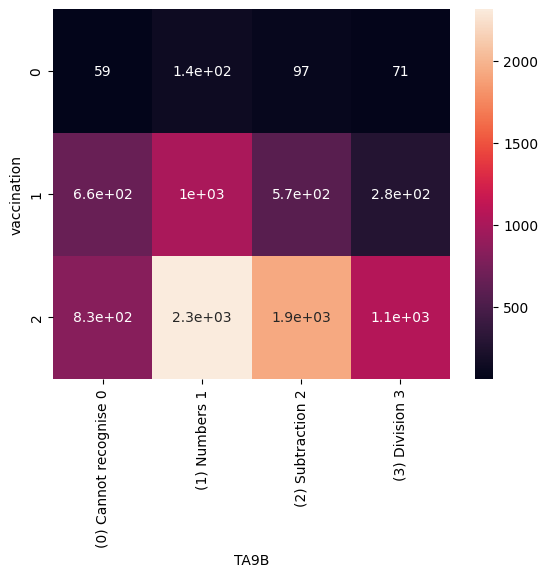

In [23]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

def bivariate(col):
    df = data_indi_2.copy()
    contingency_table = pd.crosstab(df['vaccination'], df[col])
    print(contingency_table)

    # Create a heatmap using Seaborn
    sns.heatmap(contingency_table, annot=True)  # Annotate with cell values

    # Optional: Customize the heatmap with Seaborn options (refer to Seaborn documentation)
    # sns.heatmap(contingency_table, annot=True, fmt=".2f", cmap="YlGnBu")  # Example customization

    chi2, pval, expected, observed = stats.chi2_contingency(contingency_table)
    print("Chi-square statistic:", chi2)
    print("p-value:", pval)
print("MATH")
bivariate('TA9B')

READING
TA8B         (0) Cannot read 0  (1) Letters 1  (2) Words 2  (3) Paragraph 3  \
vaccination                                                                   
0                           46             77           93               67   
1                          496            453          546              375   
2                          580            847         1330             1234   

TA8B         (4) Story 4  
vaccination               
0                     86  
1                    655  
2                   2160  
Chi-square statistic: 263.61153169171087
p-value: 2.2338653238171163e-52


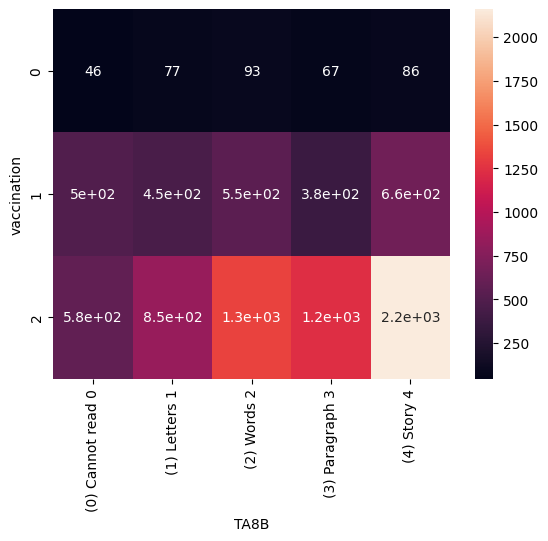

In [21]:
print("READING")
bivariate('TA8B')

WRITING
TA10B        (0) Cannot write 0  (1) 1-2 mistakes 1  (2) No mistake 2
vaccination                                                          
0                            99                 116               131
1                           954                 840               721
2                          1408                2323              2370
Chi-square statistic: 206.5151255061041
p-value: 1.4925120622080248e-43


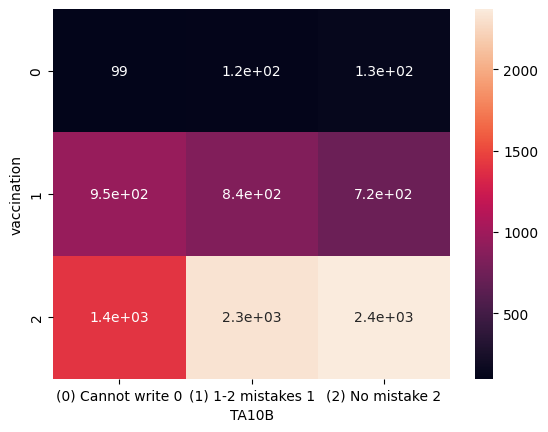

In [22]:
print("WRITING")
bivariate('TA10B')